# 0. Pytorch 버전과 MMDetection 버전 변화

In [1]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 695.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

# 1. Installation

## Step 1. Install MMCV using MIM.

In [2]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 203.1 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 7.8 MB/s eta 0:00:00


## Step 2. Install MMDetection from the source.

In [3]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36093, done.
remote: Counting objects: 100% (744/744), done.
remote: Compressing objects: 100% (388/388), done.
remote: Total 36093 (delta 376), reused 615 (delta 347), pack-reused 35349
Receiving objects: 100% (36093/36093), 52.11 MiB | 19.31 MiB/s, done.
Resolving deltas: 100% (25311/25311), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


## Step 3. Verification

In [4]:
import mmdet
print(mmdet.__version__)

2.28.2


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [5]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 43.6 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [6]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

## Step 5. Data Download


In [7]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
100% 4.21G/4.21G [02:04<00:00, 32.4MB/s]
100% 4.21G/4.21G [02:04<00:00, 36.4MB/s]


In [8]:
!mkdir lisa-traffic-light-dataset
# unzip
!unzip -q lisa-traffic-light-dataset.zip -d lisa-traffic-light-dataset

### lisa-traffic-light-dataset의 디렉토리 구조 보기

In [ ]:
# install tree first
!apt-get -q install tree

In [ ]:
!tree ./lisa-traffic-light-dataset/Annotations/Annotations/

In [ ]:
!pwd

###  이미지와 annotation 보기

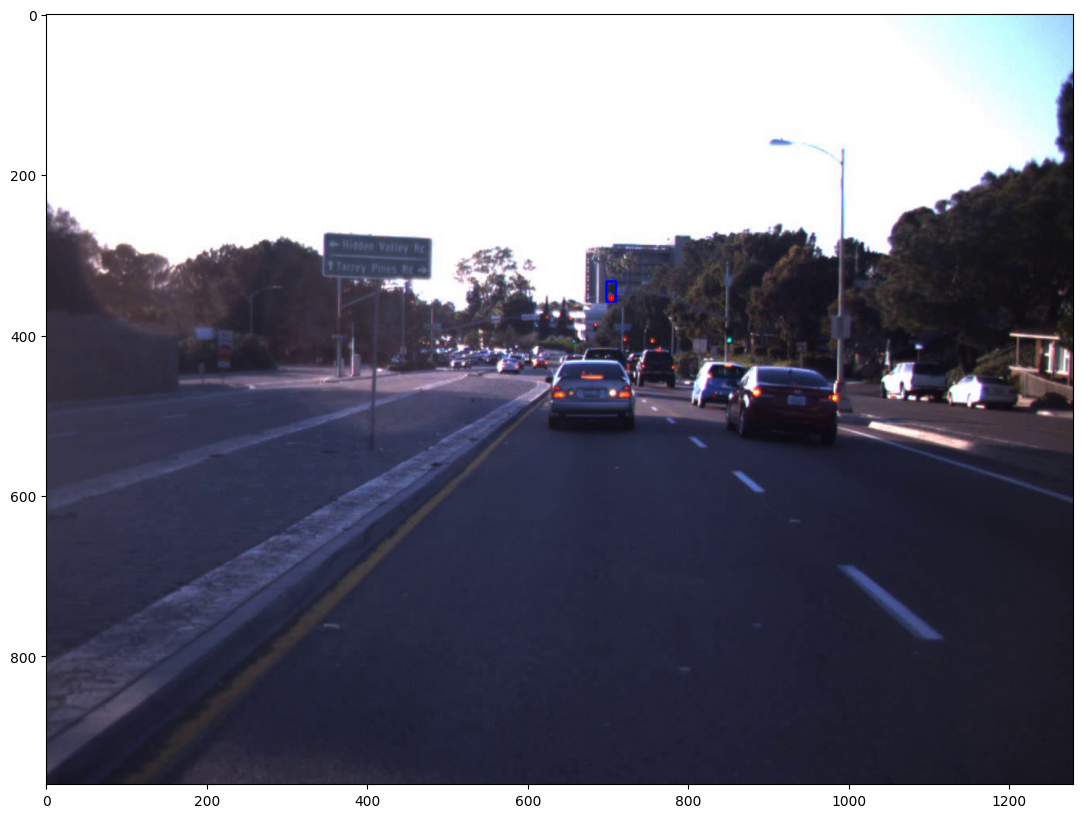

In [9]:
import mmcv
import matplotlib.pyplot as plt
import cv2
import pandas as pd

df_box = pd.read_csv('./lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/dayClip1/frameAnnotationsBOX.csv', sep=';')
df_blub = pd.read_csv('./lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/dayClip1/frameAnnotationsBULB.csv', sep=';')

box_x1 = df_box['Upper left corner X'][0]
box_y1 = df_box['Upper left corner Y'][0]
box_x2 = df_box['Lower right corner X'][0]
box_y2 = df_box['Lower right corner Y'][0]

blub_x1 = df_blub['Upper left corner X'][0]
blub_y1 = df_blub['Upper left corner Y'][0]
blub_x2 = df_blub['Lower right corner X'][0]
blub_y2 = df_blub['Lower right corner Y'][0]

img = mmcv.imread('./lisa-traffic-light-dataset/dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg')

cv2.rectangle(img, (box_x1, box_y1), (box_x2, box_y2), (255,0,0), thickness=2)
cv2.rectangle(img, (blub_x1, blub_y1), (blub_x2, blub_y2), (0,0,255), thickness=2)

plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### csv 파일 합치기

In [10]:
import glob
import os
import pandas as pd

def merge_csv(mode=None):
    dataset_path = './lisa-traffic-light-dataset/Annotations/Annotations/'

    if mode == 'train':
        day_annot_file_paths = glob.glob(dataset_path+'dayTrain/*/')
        night_annot_file_paths = glob.glob(dataset_path+'nightTrain/*/')
    elif mode == 'val':
        day_annot_file_paths = glob.glob(dataset_path+'daySequence1/')
        night_annot_file_paths = glob.glob(dataset_path+'nightSequence1/')
    elif mode == 'test':
        day_annot_file_paths = glob.glob(dataset_path+'daySequence2/')
        night_annot_file_paths = glob.glob(dataset_path+'nightSequence2/')

    columns = ['Filename', 'Annotation tag', 'Upper left corner X', 'Upper left corner Y', 'Lower right corner X', 
        'Lower right corner Y', 'Origin file', 'Origin frame number', 'Origin track', 'Origin track frame number']

    annot_df = pd.DataFrame(columns=columns)

    for file_path in day_annot_file_paths:
        box_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBOX.csv'), sep=';')
        blub_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBULB.csv'), sep=';')
        annot_df = annot_df.merge(box_df, how='outer', left_on=columns, right_on=columns)
        annot_df = annot_df.merge(blub_df, how='outer', left_on=columns, right_on=columns)
    for file_path in night_annot_file_paths:
        box_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBOX.csv'), sep=';')
        blub_df = pd.read_csv(os.path.join(file_path, 'frameAnnotationsBULB.csv'), sep=';')
        annot_df = annot_df.merge(box_df, how='outer', left_on=columns, right_on=columns)
        annot_df = annot_df.merge(blub_df, how='outer', left_on=columns, right_on=columns)

    return annot_df

In [11]:
train_df = merge_csv(mode='train')
val_df = merge_csv(mode='val')
test_df = merge_csv(mode='test')

In [12]:
train_df.shape[0], train_df['Annotation tag'].unique()

(104534,
 array(['go', 'goLeft', 'warning', 'warningLeft', 'stopLeft', 'stop'],
       dtype=object))

In [13]:
val_df.shape[0], val_df['Annotation tag'].unique()

(55706,
 array(['stop', 'go', 'warning', 'warningLeft', 'stopLeft', 'goLeft'],
       dtype=object))

In [14]:
test_df.shape[0], test_df['Annotation tag'].unique()

(66113,
 array(['stop', 'go', 'stopLeft', 'goForward', 'goLeft', 'warning'],
       dtype=object))

#### 데이터 갯수 줄이기

모든 csv파일을 합친 결과 행이 너무 많음 -> 학습이 오래 걸리므로 데이터 갯수 감소

In [15]:
train_df = train_df[(train_df['Origin frame number'] % 10) == 0]
train_df.reset_index(drop=True, inplace=True)

In [16]:
val_df = val_df[(val_df['Origin frame number'] % 10) == 0]
val_df.reset_index(drop=True, inplace=True)

In [17]:
test_df = test_df[(test_df['Origin frame number'] % 10) == 0]
test_df.reset_index(drop=True, inplace=True)

#### Annotation tag 편집

In [18]:
def changeAnnotation(x):
    if x['Annotation tag'] == 'go' or x['Annotation tag'] == 'goForward':
        return 'go'
    elif x['Annotation tag'] == 'stop' or x['Annotation tag'] == 'stopLeft':
        return 'stop' 
    elif x['Annotation tag'] == 'warning' or x['Annotation tag'] == 'warningLeft':
        return 'warning'
    elif x['Annotation tag'] == 'goLeft':
        return 'goLeft'

In [19]:
train_df['Annotation tag'] = train_df.apply(changeAnnotation,axis=1)

In [20]:
val_df['Annotation tag'] = val_df.apply(changeAnnotation,axis=1)

In [21]:
test_df['Annotation tag'] = test_df.apply(changeAnnotation,axis=1)

In [22]:
train_df.shape[0], train_df['Annotation tag'].unique()

(10496, array(['go', 'goLeft', 'warning', 'stop'], dtype=object))

In [23]:
val_df.shape[0], val_df['Annotation tag'].unique()

(5597, array(['stop', 'go', 'warning', 'goLeft'], dtype=object))

In [24]:
test_df.shape[0], test_df['Annotation tag'].unique()

(6606, array(['stop', 'go', 'goLeft', 'warning'], dtype=object))

### 이미지 옮기기

In [25]:
# 학습 / 검증 / 테스트 폴더 생성
!mkdir ./train
!mkdir ./val
!mkdir ./test

In [ ]:
# 학습 / 검증 / 테스트 폴더 삭제하는 명령어
!rm -rf ./train
!rm -rf ./val
!rm -rf ./test

In [ ]:
train_df.head(3)

Filename Annotation tag  Upper left corner X  \
0  dayTraining/dayClip7--00000.jpg             go                  707   
1  dayTraining/dayClip7--00000.jpg             go                  906   
2  dayTraining/dayClip7--00010.jpg             go                  716   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  366                   719                   396   
1                  444                   924                   469   
2                  349                   728                   374   

                                         Origin file  Origin frame number  \
0  dayTraining/dayClip7/dayClip7Shutter0.000200-G...                    0   
1  dayTraining/dayClip7/dayClip7Shutter0.000200-G...                    0   
2  dayTraining/dayClip7/dayClip7Shutter0.000200-G...                   10   

                                        Origin track  \
0  dayTraining/dayClip7/dayClip7Shutter0.000200-G...   
1  dayTraining/dayClip7/dayClip7Shutter0.000200-G...   
2  dayTraining/dayClip7/dayClip7Shutter0.000200-G...   

   Origin track frame number  
0                          0  
1                          0  
2                         10

In [26]:
# 각 df별 unique한 Filename 갯수
len(train_df['Filename'].unique()), len(val_df['Filename'].unique()), len(test_df['Filename'].unique())

(1822, 825, 1041)

In [27]:
import glob
import shutil

def image_copy(mode=None, df=None, verbose=True):
    dataset_path = './lisa-traffic-light-dataset/'

    if mode == 'train':
        day_image_file_paths = glob.glob(dataset_path+'dayTrain/dayTrain/*/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightTrain/nightTrain/*/*/*')
    elif mode == 'val':
        day_image_file_paths = glob.glob(dataset_path+'daySequence1/daySequence1/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightSequence1/nightSequence1/*/*')
    elif mode == 'test':
        day_image_file_paths = glob.glob(dataset_path+'daySequence2/daySequence2/*/*')
        night_image_file_paths = glob.glob(dataset_path+'nightSequence2/nightSequence2/*/*')

    names = [name.split('/')[-1] for name in df['Filename'].tolist()]
    day_num, night_num = 0, 0

    for image_file_path in day_image_file_paths:
        image_file_name = image_file_path.split('/')[-1]
        if image_file_name in names:
            day_num += 1
            shutil.copy(image_file_path, './' + mode)
    for image_file_path in night_image_file_paths:
        image_file_name = image_file_path.split('/')[-1]
        if image_file_name in names:
            night_num += 1
            shutil.copy(image_file_path, './' + mode)

    if verbose:
        print(f'{mode}용 데이터 : 총 {day_num + night_num} 중 day 이미지 {day_num}, night 이미지 {night_num}')

In [28]:
image_copy(mode='train', df=train_df, verbose=True)
image_copy(mode='val', df=val_df, verbose=True)
image_copy(mode='test', df=test_df, verbose=True)

train용 데이터 : 총 1822 중 day 이미지 1294, night 이미지 528
val용 데이터 : 총 825 중 day 이미지 348, night 이미지 477
test용 데이터 : 총 1041 중 day 이미지 437, night 이미지 604


- 데이터 축소 전의 갯수
train용 데이터 : 총 20535 중 day 이미지 14034, night 이미지 6501 </br>
val용 데이터 : 총 9053 중 day 이미지 4060, night 이미지 4993 </br>
test용 데이터 : 총 13428 중 day 이미지 6894, night 이미지 6534

### json 파일 만들기
- 깃허브 코드 참조 https://github.com/ruromgar/lisa_coco_converter

#### coco format으로 만들기

In [29]:
# coco format 중에서 변경이 필요없는 부분
def get_info():
    return {
        "description": "LISA Traffic Sign Dataset",
        "url": "http://cvrr.ucsd.edu/LISA/lisa-traffic-sign-dataset.html",
        "version": "2.0",
        "year": 2023
    }

def get_licenses():
    return [
        {
            "url": "https://creativecommons.org/licenses/by-nc-sa/4.0/",
            "id": 1,
            "name": "CC BY-NC-SA 4.0"
        }
    ]

In [30]:
def get_categories(df=None):
    tags = sorted(df['Annotation tag'].unique())
    print('Tags len is: ' + str(len(tags)))

    categories = []
    for i, t in enumerate(tags, 1):
        categories.append(
            {"supercategory": "", "id": i, "name": t}
        )
    
    return categories

In [31]:
def get_images(mode=None):
    images = []
    id = 0
    for file_name in os.listdir('./'+mode):
        if file_name.endswith('.jpg'):
            images.append(
            {
                "license": 1,
                "file_name": file_name,
                "height": 960,
                "width": 1280,
                "id": id
            })
            id += 1

    return images

In [32]:
def get_segmentation(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return [[
        upper_left_x, upper_left_y,
        lower_right_x, upper_left_y,
        upper_left_x, lower_right_y,
        lower_right_x, lower_right_y
    ]]

def get_area(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return (lower_right_x - upper_left_x)*(-(upper_left_y - lower_right_y))

def get_bbox(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    return [upper_left_x, upper_left_y, (lower_right_x - upper_left_x), (-(upper_left_y - lower_right_y))]

def get_annotations(df, images, categories): # images는 get_images를 통해 얻은 것
                                             # categories는 get_categories를 통해 얻은 것
    total = len(df) # 전체 열의 수
    annotations = []
    
    for idx, row in df.iterrows():
        filename = row['Filename'].split('/')[-1]
        category = row['Annotation tag']
        
        up_left_x, up_left_y = row['Upper left corner X'], row['Upper left corner Y']
        down_right_x, down_right_y = row['Lower right corner X'], row['Lower right corner Y']
        
        image_id = [i["id"] for i in images if i["file_name"].endswith(filename)][0]
        category_id = [c["id"] for c in categories if c["name"] == category][0]
        
        segmentation = get_segmentation(up_left_x, up_left_y, down_right_x, down_right_y)
        area         = get_area(up_left_x, up_left_y, down_right_x, down_right_y)
        bbox         = get_bbox(up_left_x, up_left_y, down_right_x, down_right_y)
        
        annotations.append( { "segmentation": segmentation, 
                              "area": area,
                              "iscrowd": 0,
                              "image_id": image_id,
                              "bbox": bbox,
                              "category_id": category_id,
                              "id": idx } )
        if ( idx % 1000 ) == 0:
            print(f'Processed {idx} of {total}')
        
    return annotations

In [33]:
import json

def make_json(df, mode=None):
    info = get_info()
    licenses = get_licenses()
    categories = get_categories(df)
    images = get_images(mode=mode)
    annotations = get_annotations(df, images, categories)

    total = {
            "info": info,
            "licenses": licenses,
            "images": images,
            "annotations": annotations,
            "categories": categories
    }

    with open(mode+'.json', 'w', encoding='utf-8') as f:
        json.dump(total, f, ensure_ascii=False, indent=4)

In [34]:
make_json(train_df, 'train')

Tags len is: 4
Processed 0 of 10496
Processed 1000 of 10496
Processed 2000 of 10496
Processed 3000 of 10496
Processed 4000 of 10496
Processed 5000 of 10496
Processed 6000 of 10496
Processed 7000 of 10496
Processed 8000 of 10496
Processed 9000 of 10496
Processed 10000 of 10496


In [35]:
make_json(val_df, 'val')
make_json(test_df, 'test')

Tags len is: 4
Processed 0 of 5597
Processed 1000 of 5597
Processed 2000 of 5597
Processed 3000 of 5597
Processed 4000 of 5597
Processed 5000 of 5597
Tags len is: 4
Processed 0 of 6606
Processed 1000 of 6606
Processed 2000 of 6606
Processed 3000 of 6606
Processed 4000 of 6606
Processed 5000 of 6606
Processed 6000 of 6606


#### json 파일 확인

In [ ]:
!sudo apt-get install jq

In [ ]:
!jq . ./train.json > output.json

In [ ]:
!head -100 output.json

In [ ]:
!tail -100 output.json

# Train A Detector on A Customized Dataset

### pycocotools를 이용한 COCO 데이터

In [36]:
dataDir='./'
dataType='train'
annFile='{}{}.json'.format(dataDir,dataType)
print(annFile)

./train.json


In [37]:
# COCO 객체 생성
from pycocotools.coco import COCO

coco = COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [38]:
# coco dataset의 정보
print(coco.getCatIds())
print(len(coco.getCatIds()))

[1, 2, 3, 4]
4


In [39]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': '', 'id': 1, 'name': 'go'},
 {'supercategory': '', 'id': 2, 'name': 'goLeft'},
 {'supercategory': '', 'id': 3, 'name': 'stop'},
 {'supercategory': '', 'id': 4, 'name': 'warning'}]

In [40]:
catIds = coco.getCatIds(catNms=['stop'])
catIds

[3]

In [41]:
# coco.getImgIds(catIds=catIds) : 해당 catogory_id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds)
imgIds[:10]

[0, 2, 4, 5, 7, 8, 9, 11, 16, 17]

In [42]:
imgs = coco.loadImgs(ids=imgIds)
len(imgs), imgs[:3]

(1147,
 [{'license': 1,
   'file_name': 'dayClip7--00790.jpg',
   'height': 960,
   'width': 1280,
   'id': 0},
  {'license': 1,
   'file_name': 'dayClip7--01870.jpg',
   'height': 960,
   'width': 1280,
   'id': 2},
  {'license': 1,
   'file_name': 'dayClip1--00790.jpg',
   'height': 960,
   'width': 1280,
   'id': 4}])

In [43]:
imgId = imgIds[0] 
img = coco.loadImgs(ids=imgId) # 한이미지에 대한 상세 정보
img = img[0]
img

{'license': 1,
 'file_name': 'dayClip7--00790.jpg',
 'height': 960,
 'width': 1280,
 'id': 0}

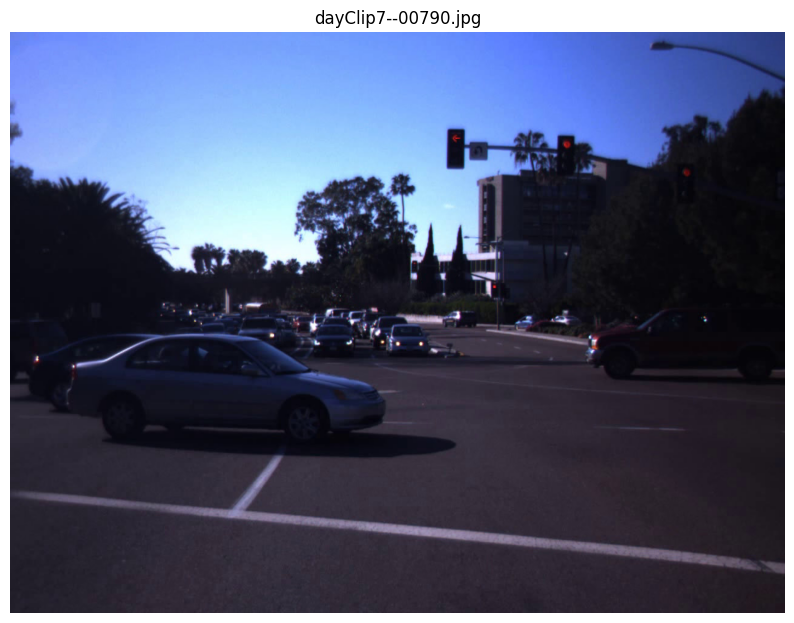

In [44]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./train/'+img['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title(img['file_name'])
plt.axis('off')
plt.show()

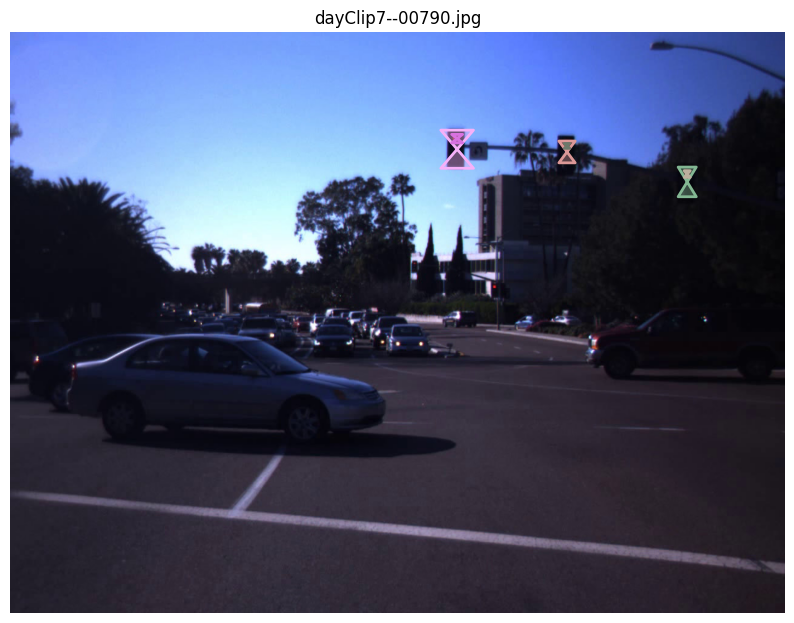

In [45]:
# showAnns() : annotation 정보들을 입력받아서 시각화 
# 단, matplotlib으로 시각화 할 수 있는 이미지 배열이 로드되어 있어야 함
image = cv2.imread('./train/'+img['file_name'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

catIds = coco.getCatIds(catNms=['stop'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title(img['file_name'])
plt.axis('off')
coco.showAnns(anns)

### lisa-traffic-light Dataset을 COCO Format으로 변환하기

In [46]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 VOCDataset을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class LisaDataset(CocoDataset):
    CLASSES = ('go', 'goLeft', 'stop','warning')

#### cfg 수정

In [47]:
from mmcv import Config
cfg = Config.fromfile('./configs/yolo/yolov3_d53_mstrain-608_273e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 32

In [48]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'LisaDataset'
cfg.data_root = './'

cfg.data.test.type = 'LisaDataset'
cfg.data.test.data_root = './'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'test'

cfg.data.train.type = 'LisaDataset'
cfg.data.train.data_root = './'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'LisaDataset'
cfg.data.val.data_root = './'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'val'

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 4

# If we need to finetune a model based on a pre-trained detector,
# we need to use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'

# Set up working dir to save files and logs.
cfg.work_dir = 'save_model'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
# cfg.optimizer.lr = 0.001 / 8
# cfg.lr_config.warmup = None

cfg.optimizer.lr = 0.001 / 8
cfg.optimizer.momentum = 0.95
cfg.log_config.interval = 5

# max epochs 12 
cfg.runner.max_epochs = 10 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 2

# Change the evaluation metric since we use customized dataset.
# note.
# detection evaluation에 map를 설정하면 iou가 0.5 일때만
# cocodata로 detection 할 때는 bbox를 설정해야 다양한 iou 기준 출력
# CocoDataset의 경우 metric을 bbox로 설정해야 함.
# (mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
checkpoint_config = dict(interval=5)
log_config = dict(
    interval=5,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=64)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='Darknet',
        depth=53,
        out_indices=(3, 4, 5),
        init_cfg=dict(type='Pretrained', checkpoint='open-mmlab://darknet53')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=4,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
  

In [49]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [50]:
train_dataset # 1822개의 train imgage


LisaDataset Train dataset with number of images 1822, and instance counts: 
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| category | count | category   | count | category | count | category    | count | category      | count |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| 0 [go]   | 4676  | 1 [goLeft] | 246   | 2 [stop] | 5247  | 3 [warning] | 327   | -1 background | 0     |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+

In [51]:
test_dataset # 1041개의 test image


LisaDataset Train dataset with number of images 1041, and instance counts: 
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| category | count | category   | count | category | count | category    | count | category      | count |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+
| 0 [go]   | 2669  | 1 [goLeft] | 129   | 2 [stop] | 3704  | 3 [warning] | 104   | -1 background | 0     |
+----------+-------+------------+-------+----------+-------+-------------+-------+---------------+-------+

### Pre Trained 모델 다운로드

In [52]:
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth \
      -O checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth

--2023-05-17 12:20:02--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.209, 47.246.48.205, 47.246.48.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248093138 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  51.8MB/s    in 5.4s    

2023-05-17 12:20:08 (43.5 MB/s) - ‘checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’ saved [248093138/248093138]



#### cfg 수정버전으로 모델 적용

In [53]:
from mmdet.models import build_detector

# Build the detector
# Add an attribute for visualization convenience

model = build_detector(cfg.model)

model.CLASSES = train_dataset.CLASSES

### 모델 학습 수행

In [ ]:
import os.path as osp
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True)

2023-05-17 10:28:31,829 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2023-05-17 10:28:32,195 - mmdet - INFO - load checkpoint from local path: checkpoints/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth


Done (t=0.35s)
creating index...
index created!


2023-05-17 10:28:32,419 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.convs_pred.0.weight: copying a param with shape torch.Size([255, 1024, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 1024, 1, 1]).
size mismatch for bbox_head.convs_pred.0.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([27]).
size mismatch for bbox_head.convs_pred.1.weight: copying a param with shape torch.Size([255, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 512, 1, 1]).
size mismatch for bbox_head.convs_pred.1.bias: copying a param with shape torch.Size([255]) from checkpoint, the shape in current model is torch.Size([27]).
size mismatch for bbox_head.convs_pred.2.weight: copying a param with shape torch.Size([255, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([27, 256, 1, 1]).
size mismatch for bbox_head.convs_pred.2.bi

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 825/825, 19.2 task/s, elapsed: 43s, ETA:     0s

2023-05-17 10:45:13,029 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.46s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.42s).
Accumulating evaluation results...


2023-05-17 10:45:18,074 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.163
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.055
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.318
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.97s).


2023-05-17 10:45:22,817 - mmdet - INFO - Epoch [6][5/456]	lr: 1.250e-04, eta: 0:15:48, time: 0.933, data_time: 0.506, memory: 6197, loss_cls: 7.5523, loss_conf: 27.1045, loss_xy: 35.0644, loss_wh: 4.9477, loss: 74.6689, grad_norm: 605.7490
2023-05-17 10:45:24,982 - mmdet - INFO - Epoch [6][10/456]	lr: 1.250e-04, eta: 0:15:46, time: 0.434, data_time: 0.017, memory: 6197, loss_cls: 9.9721, loss_conf: 23.5702, loss_xy: 40.3009, loss_wh: 6.2187, loss: 80.0618, grad_norm: 614.6192
2023-05-17 10:45:27,338 - mmdet - INFO - Epoch [6][15/456]	lr: 1.250e-04, eta: 0:15:44, time: 0.471, data_time: 0.023, memory: 6197, loss_cls: 4.3192, loss_conf: 17.4528, loss_xy: 38.0557, loss_wh: 4.0277, loss: 63.8554, grad_norm: 504.3134
2023-05-17 10:45:29,382 - mmdet - INFO - Epoch [6][20/456]	lr: 1.250e-04, eta: 0:15:42, time: 0.408, data_time: 0.014, memory: 6197, loss_cls: 10.8991, loss_conf: 22.8179, loss_xy: 39.1278, loss_wh: 5.6266, loss: 78.4714, grad_norm: 655.2206
2023-05-17 10:45:31,282 - mmdet - IN

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 825/825, 19.3 task/s, elapsed: 43s, ETA:     0s

2023-05-17 11:01:54,871 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.38s).
Accumulating evaluation results...


2023-05-17 11:01:57,782 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.173
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.012
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.139
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.130
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.127
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.361
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.45s).


### 학습 모델로 결과 예측

In [ ]:
test_df.head(3)

Filename Annotation tag  Upper left corner X  \
0  dayTest/daySequence2--00150.jpg           stop                 1004   
1  dayTest/daySequence2--00160.jpg           stop                  946   
2  dayTest/daySequence2--00160.jpg           stop                  834   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  349                  1019                   376   
1                  391                   958                   409   
2                  345                   852                   372   

                                         Origin file  Origin frame number  \
0  dayTest/daySequence2/Day2NoonShutter0.000200-G...                  150   
1  dayTest/daySequence2/Day2NoonShutter0.000200-G...                  160   
2  dayTest/daySequence2/Day2NoonShutter0.000200-G...                  160   

                                        Origin track  \
0  dayTest/daySequence2/Day2NoonShutter0.000200-G...   
1  dayTest/daySequence2/Day2NoonShutter0.000200-G...   
2  dayTest/daySequence2/Day2NoonShutter0.000200-G...   

   Origin track frame number  
0                        150  
1                        160  
2                        160

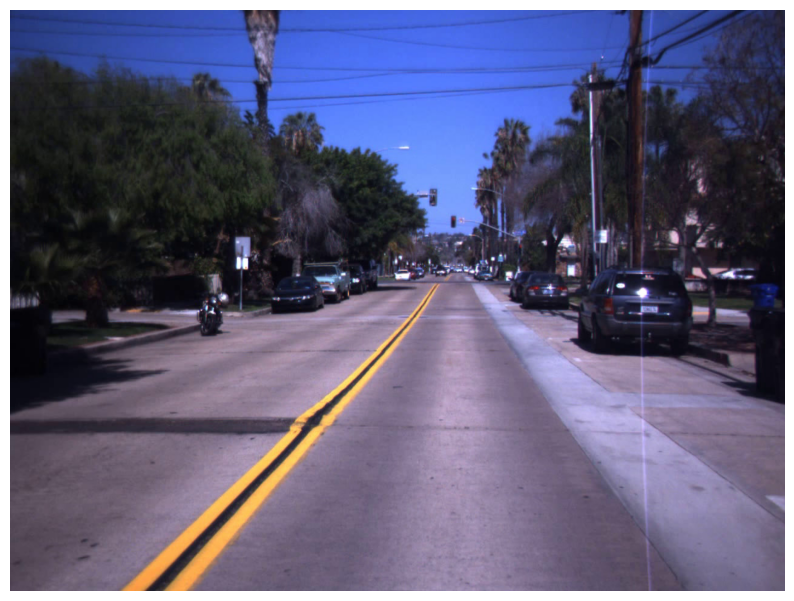

In [54]:
image = cv2.imread('./test/daySequence2--00170.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load checkpoint from local path: /content/drive/MyDrive/플레이데이터_부트캠프/epoch_10.pth


/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


result:  4


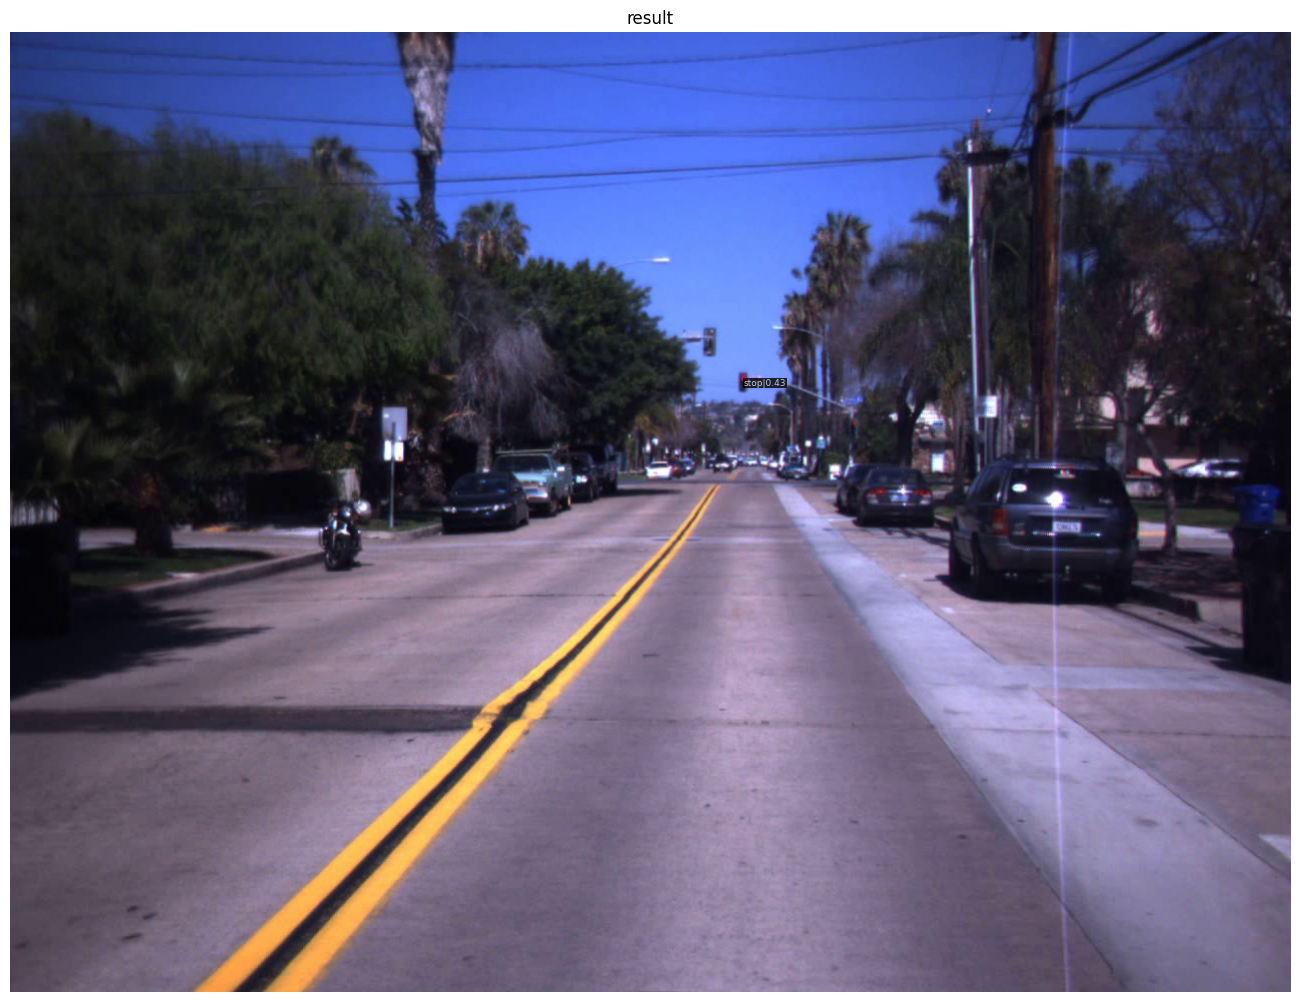

In [59]:
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/drive/MyDrive/플레이데이터_부트캠프/epoch_10.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
img = mmcv.imread('./test/daySequence2--00170.jpg') # BGR Image 사용 

result = inference_detector(model_ckpt, img)

print('result: ',len(result))

show_result_pyplot(model_ckpt, img, result, score_thr=0.2)

### 모델 평가

In [60]:
from mmdet.datasets import build_dataloader, build_dataset

# test용 Dataset과 DataLoader 생성. 
data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': './test/nightSequence2--02150.jpg', 'ori_filename': 'nightSequence2--02150.jpg', 'ori_shape': (960, 1280, 3), 'img_shape': (456, 608, 3), 'pad_shape': (480, 608, 3), 'scale_factor': array([0.475, 0.475, 0.475, 0.475], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([0., 0., 0.], dtype=float32), 'std': array([255., 255., 255.], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
  
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0

In [63]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 결과 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, False, '/content/show_test_output', 0.3)

[                                                  ] 0/1041, elapsed: 0s, ETA:

AttributeError: ignored

In [ ]:
metric = test_dataset.evaluate(results, metric=['bbox'])
print(metric)